In [32]:
import pandas as pd

import glob
import os
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2

plt.style.use('https://gist.githubusercontent.com/lpsy/'
              'e81ff2c0decddc9c6dfeb2fcffe37708/raw/lsy_personal.mplstyle')


In [2]:
DATAPATH = '/mnt/processed/private/msds2020cpt12/shopee-code-league/product-detection'

In [3]:
df_train = pd.read_csv(os.path.join(DATAPATH, 'train.csv'))
df_test = pd.read_csv(os.path.join(DATAPATH, 'test.csv'))

In [4]:
df_train.groupby('category').count().sort_values('filename', ascending=False)

,filename
category,
24,2705
30,2705
3,2703
4,2703
1,2702
27,2702
8,2700
9,2698
25,2692


In [5]:
df_test.head()

,filename,category
0,fd663cf2b6e1d7b02938c6aaae0a32d2.jpg,43
1,c7fd77508a8c355eaab0d4e10efd6b15.jpg,43
2,127f3e6d6e3491b2459812353f33a913.jpg,43
3,5ca4f2da11eda083064e6c36f37eeb81.jpg,43
4,46d681a542f2c71be017eef6aae23313.jpg,43


In [6]:
from collections import defaultdict
from tqdm import tqdm

In [7]:
def getImageSizes(image_files, dir_='train'):
    
    output = defaultdict(list)
    for cat in image_files:
        for image_name in tqdm(image_files[cat], desc=f'Class {cat:02}'):
            if dir_ == 'train':
                filepath = os.path.join(
                    DATAPATH, dir_, dir_, f'{cat:02}', image_name
                )
            elif dir_ == 'test':
                filepath = os.path.join(
                    DATAPATH, dir_, dir_, image_name
                )
            img = cv2.imread(filepath)
            output[cat].append(img.shape)
        
    return dict(output)

In [8]:
image_files = df_train.groupby('category').filename.apply(list).to_dict()

In [9]:
imageSizes = getImageSizes(image_files)

Class 41: 100%|██████████| 2662/2662 [00:42<00:00, 62.60it/s]


In [10]:
import numpy as np

In [12]:
heights = []
widths = []
channels = []

for cat in imageSizes:
    for imgSize in imageSizes[cat]:
        h, w, c = imgSize
        heights.append(h)
        widths.append(w)
        channels.append(c)
        
heights = np.array(heights)
widths = np.array(widths)
channels = np.array(channels)

In [13]:
from scipy import stats

stats.describe(heights)

DescribeResult(nobs=105392, minmax=(1, 1024), mean=709.6242693942614, variance=29045.238971484694, skewness=-0.012501196944593212, kurtosis=0.14150963929741112)

In [14]:
stats.describe(widths)

DescribeResult(nobs=105392, minmax=(1, 1024), mean=709.602522013056, variance=29054.401004351887, skewness=-0.012696186202088542, kurtosis=0.1409058731604098)

In [15]:
stats.describe(channels)

DescribeResult(nobs=105392, minmax=(3, 3), mean=3.0, variance=0.0, skewness=0.0, kurtosis=-3.0)

In [16]:
squares = 0
for h, w in zip(widths, heights):
    if h == w:
        squares += 1
squares

105356

In [17]:
widths[:10]

array([ 729, 1024,  800,  700,  800,  500,  800,  600,  640,  800])

In [19]:
heights[:10]

array([ 729, 1024,  800,  700,  800,  500,  800,  600,  640,  800])

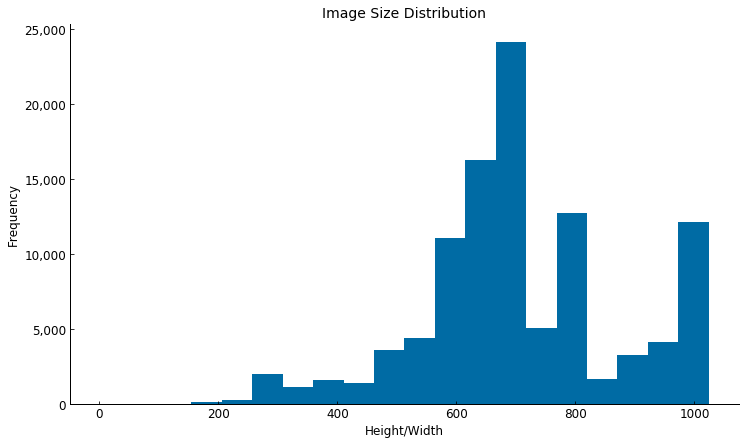

In [33]:
fig, ax = plt.subplots(figsize=(12,7))

ax.hist(heights, bins=20);
ax.set(ylabel='Frequency', xlabel='Height/Width', title='Image Size Distribution')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'));